In [1]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [2]:
N = 51                              
x_start, x_end = -1.0, 2.0
y_start, y_end = -0.5, 0.5            
x = numpy.linspace(x_start, x_end, N)    
y = numpy.linspace(y_start, y_end, N)    
X, Y = numpy.meshgrid(x, y)   

In [3]:
u_inf = 1.0

In [4]:
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

In [5]:
def get_velocity_source(strength, xs, ys, X, Y):
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)

    
    return u, v

def get_stream_function_source(strength, xs, ys, X, Y):
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))

    return psi

In [9]:
strength_source=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_sigma.txt')
x_source=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_x.txt')
y_source=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_y.txt')


In [14]:
u_source_all,v_source_all,psi_source_all=0,0,0
for i in range(100):
    u_source, v_source= get_velocity_source(strength_source[i], x_source[i], y_source[i], X, Y)
    u_source_all=u_source_all+u_source
    v_source_all=v_source_all+v_source

    psi_source= get_stream_function_source(strength_source[i], x_source[i], y_source[i], X, Y)
    psi_source_all=psi_source_all+psi_source


In [12]:
range(100)
for i in range(100):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


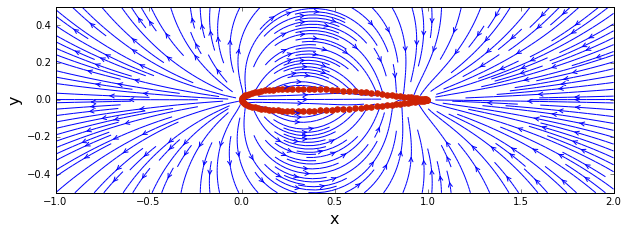

In [33]:
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_source_all, v_source_all, 
               density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_source, y_source, color='#CD2305', s=30, marker='o');

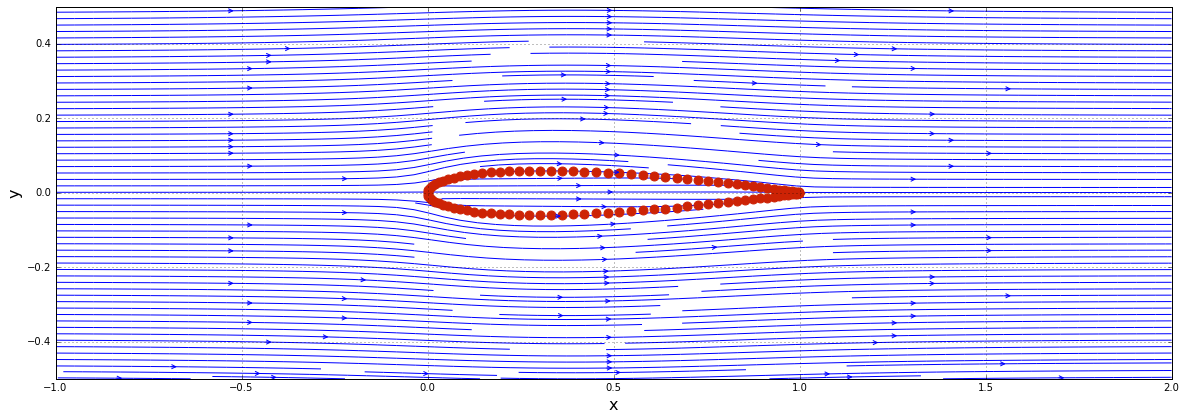

In [21]:
u = u_freestream + u_source_all
v = v_freestream + v_source_all
psi = psi_freestream + psi_source_all

size=20
pyplot.figure(figsize=(size,(y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.streamplot(X,Y,u,v,density=2,linewidth=1,arrowsize=1,arrowstyle='->')
pyplot.scatter(x_source,y_source,color='#CD2305',s=80,marker='o')


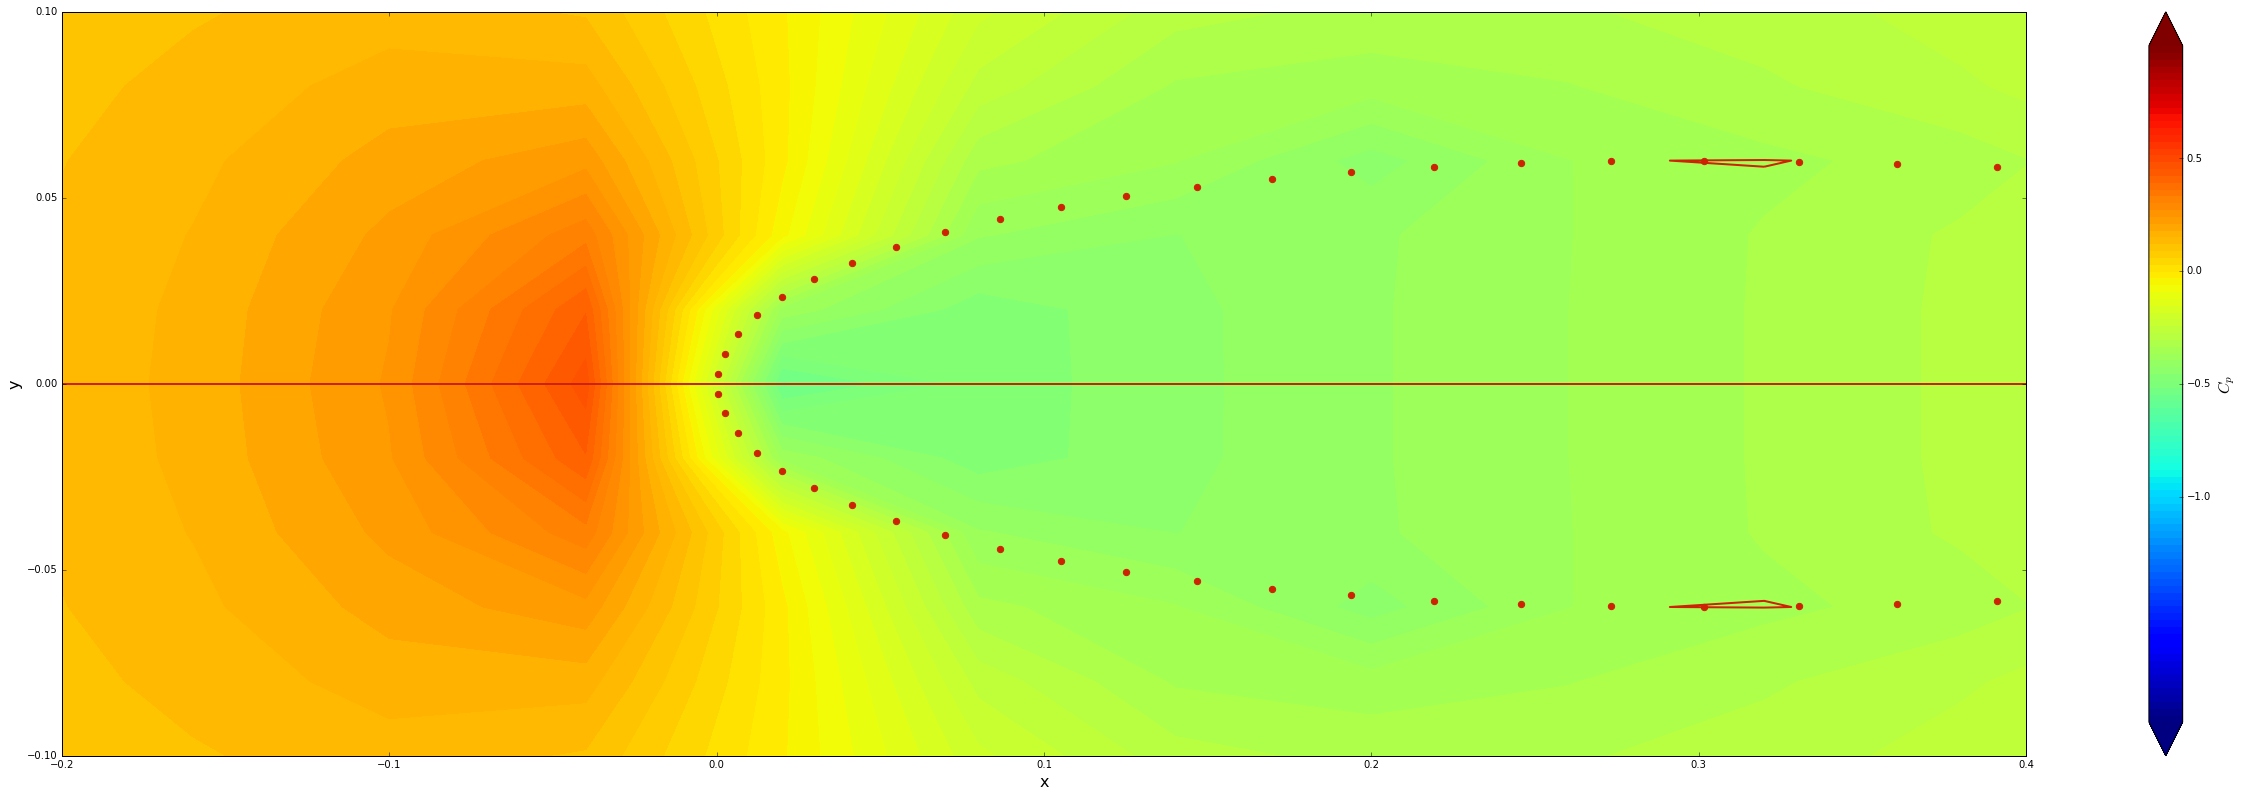

In [35]:
cp = 1.0 - (u**2+v**2)/u_inf**2

size = 20
pyplot.figure(figsize=(1.1*size*2, (y_end-y_start)/(x_end-x_start)*size*2))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start/5, x_end/5)
pyplot.ylim(y_start/5, y_end/5)
contf = pyplot.contourf(X, Y, cp, levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-1.0, -0.5, 0.0, 0.5])
pyplot.scatter(x_source, y_source, color='#CD2305', s=40, marker='o')
pyplot.contour(X,Y,psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')

In [27]:
numpy.argmax(cp)//200

6

In [26]:
numpy.max(cp)

0.47144366133162408

In [29]:
numpy.argmax(cp)%N

16

In [31]:
numpy.argmax(cp)//N

25